# Group work 6 student suggestions

CPU cooling
- Thermometer: tells you actual temperature, but prone to human installation error
- Fan speed sensor: tells you if cooling system is operational, but difficult to control temperature through fan speed
- CPU power usage: can tell you how efficient cooling is

Quad rotor drone
- Desirable sensors: Gyroscope/accelerometer - cheaper, doesn't depend on external factors (light, location)
- Less desirable sensors: GPS/cameras - dependent on external conditions (light levels, GPS connection); radar/lidar - unreliable and expensive

# DC Motor Speed

![DC motor speed](https://drive.google.com/uc?id=1D6T5BFxB1lHTQAmQTVo_Qb5sduRpikON)

Source: https://ctms.engin.umich.edu/CTMS/index.php?example=MotorSpeed&section=SystemModeling

### Input (u)

(V) voltage source

### Output (y)

($\dot{\theta}$) rotational speed of shaft

### Constants

(J)     moment of inertia of the rotor     0.01 kg.m^2

(b)     motor viscous friction constant    0.1 N.m.s

(Ke)    electromotive force constant       0.01 V/rad/sec

(Kt)    motor torque constant              0.01 N.m/Amp

(R)     electric resistance                1 Ohm

(L)     electric inductance                0.5 H

Let Ke=Kt=K

#### Transfer function

$$G_{yu}=\frac{K}{(Js+b)(Ls+R)+K^2}$$

In [5]:
import numpy as np
from matplotlib import pyplot as plt

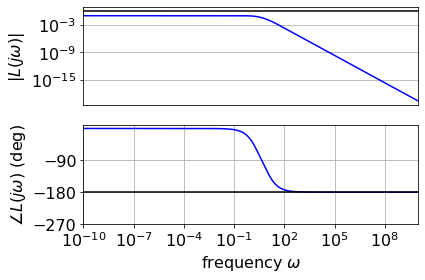

In [7]:
J = .01
b = .1
K = .01
R = 1.
ell = .5 

L = lambda s : K/((J*s+b)*(ell*s+R)+K**2)


omega = np.logspace(-10,10,1000)
xlim = omega[[0,-1]]

abs_L = np.abs(L(1.j*omega))
angle_L = np.unwrap(np.angle(L(1.j*omega)))*180./np.pi

# critical = (angle_L < -180).nonzero()[0][0]

plt.figure(); axs = []
ax = plt.subplot(2,1,1); ax.grid('on')
ax.loglog(omega,abs_L,'b-')
ax.loglog(xlim,[1.,1.],'k-')
# ax.loglog(omega[critical],abs_L[critical],'ro')
ax.set_ylabel(r'$|L(j\omega)|$')
ax.set_xticks([])
ax.set_xlim(xlim)
axs.append(ax)

ax = plt.subplot(2,1,2); ax.grid('on')
ax.semilogx(omega,angle_L,'b-')
ax.semilogx(xlim,[-180.,-180.],'k-')
# ax.semilogx(omega[critical],angle_L[critical],'ro')
ax.set_xlabel(r'frequency $\omega$')
ax.set_ylabel(r'$\angle L(j\omega)$ (deg)')
ax.set_yticks([-90,-180,-270])
ax.set_xlim(xlim)
axs.append(ax)

for ax in axs:
  for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
               ax.get_xticklabels() + ax.get_yticklabels()):
      item.set_fontsize(16)